In [38]:
import pandas as pd, numpy as np
import sklearn
import scipy.sparse
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
import re
from sklearn.metrics import f1_score

In [39]:
data = pd.read_csv('../data/raw_data/kaggle/train.csv')
labels=(data["toxic"] | data["severe_toxic"] | data["obscene"] | data["threat"] | data["insult"] | data["identity_hate"])
# labels=data["Labels"]
train_data = data[0:100000]
test_data = data[100001:]
train_labels = labels[0:100000]
test_labels = labels[100001:]

corpus = data["comment_text"]

In [40]:
def review_to_words( corpus ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    new_corp = []
    i=0
    for rev in corpus:
        i+=1
        if(i%10000 == 0):
            print("iter", i/10000,"of", len(corpus)/10000)
        
        # 1. Remove HTML
        review_text = BeautifulSoup(rev).get_text() 
        #
        # 2. Remove non-letters        
        letters_only = re.sub("[^a-zA-Z']", " ", review_text)

        p = letters_only.split()
        new_corp.append(" ".join(p))
    return(new_corp)   

## Multinomial naive bayes

In [41]:
corpus = list(corpus)
new_corp=review_to_words(corpus)


iter 1.0 of 15.9571
iter 2.0 of 15.9571
iter 3.0 of 15.9571
iter 4.0 of 15.9571
iter 5.0 of 15.9571
iter 6.0 of 15.9571
iter 7.0 of 15.9571
iter 8.0 of 15.9571
iter 9.0 of 15.9571
iter 10.0 of 15.9571
iter 11.0 of 15.9571
iter 12.0 of 15.9571
iter 13.0 of 15.9571
iter 14.0 of 15.9571
iter 15.0 of 15.9571


In [52]:
def cross_val_count_vec(vectorizer, corpus):
    X = vectorizer.fit_transform(corpus)
    train_feature_vectors_sparse = X[0:100000]
    test_feature_vectors_sparse = X[100001:]
    # TRAINING

    clf = MultinomialNB()
    clf.fit(train_feature_vectors_sparse, train_labels)

    # PREDICTION
    predictions = clf.predict(test_feature_vectors_sparse)


    # PERFORMANCE METRICS

    confmat = confusion_matrix(test_labels, predictions)

    precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
    recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
    fScore = f1_score(test_labels, predictions, average='weighted')
    ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))

    print("Precision = ",precision)
    print("Recall = ",recall)
    print("F_score = ",fScore)
    print("CCR = ",ccr)
    print()
    print("Confusion Matrix: \n", confmat)
    
    return [precision,recall, fScore, ccr]

In [45]:
fsc = []
prec = []
recall = []
ccr = []
for i in range (1,11):
    print("Iter", i)
    vectorizer = CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english',ngram_range=(1, i))
    res = cross_val_count_vec(vectorizer, new_corp)
    fsc.append(res[2])
    prec.append(res[0])
    recall.append(res[1])
    ccr.append(res[3])


Iter 1
Precision =  0.618826648989062
Recall =  0.7595606183889341
F_score =  0.9388657718381463
CCR =  0.9415477589390633

Confusion Matrix: 
 [[52354  1182]
 [ 2300  3734]]
Iter 2
Precision =  0.4643685780576732
Recall =  0.8632162661737524
F_score =  0.9298044665026337
CCR =  0.938291086117173

Confusion Matrix: 
 [[53092   444]
 [ 3232  2802]]
Iter 3
Precision =  0.48989061982101423
Recall =  0.8333803213983648
F_score =  0.9311138275701375
CCR =  0.938408594930334

Confusion Matrix: 
 [[52945   591]
 [ 3078  2956]]
Iter 4
Precision =  0.5546900894928737
Recall =  0.7349582784365393
F_score =  0.9305085118895404
CCR =  0.9346315259358737

Confusion Matrix: 
 [[52329  1207]
 [ 2687  3347]]
Iter 5
Precision =  0.6372224063639377
Recall =  0.5613958242079136
F_score =  0.9152483387074932
CCR =  0.9128252476078563

Confusion Matrix: 
 [[50532  3004]
 [ 2189  3845]]
Iter 6
Precision =  0.7142857142857143
Recall =  0.37993653032440056
F_score =  0.8716055569073266
CCR =  0.85297968776229

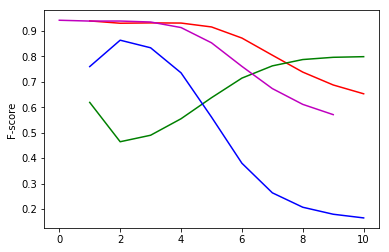

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 11, 1), fsc, 'r', np.arange(1, 11, 1), prec, 'g', np.arange(1, 11, 1), recall, 'b', ccr, 'm')
plt.ylabel('F-score')
legend('F-sc', 'Prec', 'Recall', 'CCR')
plt.show()


In [60]:
vectorizer = CountVectorizer(lowercase=True,stop_words='english', analyzer="word",token_pattern=r'\w{1,}')

cross_val_count_vec(vectorizer, new_corp)

Precision =  0.6118660921445144
Recall =  0.759046052631579
F_score =  0.8225456109001
CCR =  0.9410105757931845

Confusion Matrix: 
 [[52364  1172]
 [ 2342  3692]]


[0.6118660921445144, 0.759046052631579, 0.8225456109001, 0.9410105757931845]

168499